







































## Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

### Mentoria Diplomatura en Ciencia de Datos 2020
### "Detección del desarrollo del cultivo con imágenes de Drones"


### GRUPO 2:
    - Bazan Garcia Gaspar
    - Suarez Franco 
    - Zarazaga Lucio

**Devolución; Muy completo y claro el informe. Observaciones en los enunciados en letra mayúscula**

### Analisis y Visualizacion de datos
Se propone la elaboración de un informe o presentacion, en formato jupyter notebook que responda a las cuestiones solicitadas en cada seccion de este notebook.

El trabajo debe ser capaz de ser comprendido por un publico general, no especializado en ciencia de datos, por lo cual debe estar redactado de forma consisa y comprensible.

### 1 - Analisis General

- Cuantas entradas posee el dataset y que representa cada una?
- Si queremos encontrar un modelo que describa el objetivo de predecir el estado fenológico del cultivo cual seria a su parecer la variable de salida?
- Si queremos encontrar modelos que describan los rendimientos del cultivo cuales serian a su parecer la variable de salida?

### 2 - Analisis Estadistico
- Cuales son las variables numericas?
- Cuanto valen los principales estadisticos?
- Existen valores que no sean validos? Cuales? Que se puede hacer en esos casos?
- Como es la distribucion de los valores? Son normales?
- Calcule los principales estadisticos despues del preprocesamiento.
  
  Graficar los puntos anteriores.
  
- Cuales son las variables categoricas? Cual es la cardinalidad de las mismas?
- Si considera que existen variables categóricas redundantes, las eliminaria?
- Cuales son los 3 valores mas comunes de cada categoria?
- Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.
- Cuando sea posible calcule la correlacion entre cada variable y con las variables de las salidas (targets).
OBS: EN ÉSTE PUNTO DEBERÍAN PRESENTAR EL GRÁFICO SNS HEATMAP PARA OBSERVAR CON MAYOR CLARIDAD LA CORRELACIÓN ENTRE TODAS LAS VARIABLES Y LAS POSIBLES TARGETS
- Cual es la variable de mayor correlacion con las de salida.
- Que variables estan altamente correlacionadas entre si? que se puede hacer con ellas?
- Escoja una variable categorica y calcule las distribuciones condicionales para cada nivel de la misma.
OBS: SERÍA BUENO ESCOGER LA VARIABLE VARIEDAD QUE ES LA DE MAYOR IMPORTANCIA Y GRAFICAR CON RESPECTO A LA TARGET. TAMBIÉN SE PODRÍA OBSEVAR QUE PASA DENTRO DE CADA CICLO
- Como podemos saber si las distribuciones condicionales son diferentes entre ellas?

### 3. Preguntas de Orientación
A continuación se presenta una serie de preguntas disparadoras, a modo de ayuda para encaminar el análisis y la visualización de los datos que deberán responderlas de manera obligatoria.

Con respecto al diseño experimental
- ¿Cómo se distribuyen los rendimientos en el dataset de forma global, por columna,por fila,por parcela?
- ¿Las bandas expectrales,como se distribuyen por parcelas? 
- ¿Los índices expectrales, como se distribuyen por parcelas?
- ¿Son necesarios los datos del diseño experimental?, cuáles?

- Que variable numérica de importancia transformaría en categórica?
- ¿Cómo se correlacionan la escala de ZADOKS y las bandas expectrales? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- ¿Cómo se correlacionan la escala de ZADOKS y los índices expectrales? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- ¿Cómo se distribuyen las bandas expectrales,los índices expectrales,los rendimientos,p grano,en las variedades,en las escalas de ZADOKS,? Explorar las métricas o estadísticos dentro de cada y compararlas.

### Importaciones

In [ ]:
        # Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Carga de datos

In [ ]:
#Cargamos los datos de las imágenes ya procesadas de drones
#df = pd.read_csv('./uav.csv',decimal=",",sep=";")
df = pd.read_csv('./Dron1.csv',decimal=".",sep=",")

C:\Users\Franco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Previsualización de datos
df.head(5)

,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
0,-2.057.297.803.054.350,-2.120.827.812.446.900,1er Siembra,12203,CL,Variedad_J,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
1,-2.057.297.676.715.260,-2.120.827.773.572.710,1er Siembra,12204,CL,Variedad_J,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
2,-2.057.297.550.375.270,-2.120.827.734.699.420,1er Siembra,12205,CL,Variedad_J,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
3,-2.057.297.971.508.270,-2.120.827.735.509.350,1er Siembra,12206,CL,Variedad_J,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
4,-2.057.297.845.168.280,-2.120.827.696.635.160,1er Siembra,12207,CL,Variedad_J,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


### 2 Análisis general del dataset

In [ ]:
# Observamos las dimensiones del dataset
df.shape

(38920, 45)

In [ ]:
# Listado de columnas
df.columns

Index(['Longitude', 'Latitude', 'Conjunto de datos', 'ID ', 'Ciclos',
       'Variedad', 'Rep', 'Parcela', 'ZADOCK', 'fila', 'columna', 'Azul',
       'Verde', 'Rojo', 'Borde rojo', 'Infra Rojo', 'NDVI', 'NDRE', 'SAVI',
       'SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI',
       'NGRVI', 'Roya (%)', 'Manchas Foliares', 'Fusariosis', 'Carbon (%)',
       'Adversidades', 'Fecha de espigaz?', 'Fecha de madurez',
       'dias entre fechas', 'Vuelco', 'Altura', 'Aspecto ', 'Peso hecto',
       'Peso de 1000 granos', 'p grano', 'hum', 'PAJUST', 'RDTO'],
      dtype='object')

la variable ZADOKS indica el momento fenológico para cada variedad y es una target que se desea predecir, también lo es rendimiento

  En éste primer práctico no utilizaremos la georeferencia de los píxeles

In [ ]:
# Obtenemos los tipos de datos por columnas
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Longitude,object
Latitude,object
Conjunto de datos,object
ID,int64
Ciclos,object
Variedad,object
Rep,int64
Parcela,int64
ZADOCK,float64


Se observan que hay varias variables que no se corresponden con el tipo de dato.
- Parcela es un identificador categórico y se lo interpreta como un número, lo mismo ocurre con fila, columna, repetición.
- Algunos índices de vegetación, están representados como texto y no como números. 
- Fechas están como texto

In [ ]:
# Convertimos los identificadores del diseño experimental a strings
#df['Parcela'] = df.Parcela.astype(str)
df['Rep'] = df.Rep.astype(str)
df['columna'] = df.columna.astype(str)
df['fila'] = df.fila.astype(str)


#### Análisis descriptivo Estadístico

In [ ]:
# Variables categóricas y variables numéricas
cat_feature = df.columns[df.dtypes == 'object']
num_feature = df.columns[df.dtypes != 'object']

In [ ]:
# Descripcion Variables Numericas
df[num_feature].describe().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,38920.0,10768.725128,5885.805911,1.0000,5783.750000,10653.50000,15599.2500,22613.0000
Parcela,38920.0,70.379496,42.052894,1.0000,33.000000,69.00000,107.0000,144.0000
ZADOCK,38920.0,5.776295,0.811692,3.9000,5.400000,5.90000,6.5000,6.9000
Azul,38920.0,54136.002055,6738.960154,35300.0000,49600.000000,54200.00000,58400.0000,83800.0000
Verde,38920.0,18604.489979,19970.612059,10000.0000,12090.000000,13430.00000,14870.0000,99900.0000
Rojo,38920.0,55272.557554,14307.772507,10000.0000,46500.000000,55100.00000,63500.0000,99900.0000
Borde rojo,38920.0,35321.392857,6606.948615,12500.0000,30560.000000,35230.00000,39860.0000,55230.0000
Infra Rojo,38920.0,17004.025180,3031.438494,10000.0000,14998.000000,17139.00000,19165.0000,66870.0000
NDVI,38920.0,-0.512690,0.118843,-0.8157,-0.573700,-0.51940,-0.4698,0.4266
NDRE,38920.0,-0.347983,0.054897,-0.6342,-0.379400,-0.34540,-0.3148,0.6661


In [ ]:
# Descripcion Variables Categoricas
df[cat_feature].describe().T
df.describe(include='O').T

,count,unique,top,freq
Longitude,38920,32911,-2.057.303.490.774.830,3
Latitude,38920,38017,-2.120.840.180.787.430,2
Conjunto de datos,38920,2,1er Siembra,20343
Ciclos,38920,2,CC,20383
Variedad,38920,23,Variedad_K,3289
Rep,38920,3,3,13516
fila,38920,3,3,13222
columna,38920,48,11,1041
Manchas Foliares,38920,5,cero,36586
Fusariosis,38920,3,cero,33968


In [ ]:
#Observamos la cantidad de valores por cada categoría para una determinada variable
df.Variedad.value_counts()

Variedad_K     3289
Variedad_T     3279
Variedad_Q     3136
Variedad_A     1793
Variedad_E     1739
Variedad_N     1719
Variedad_P     1695
Variedad_L     1679
Variedad_G     1675
Variedad_B     1669
Variedad_C     1668
Variedad_F     1623
Variedad_J     1608
Variedad_H     1600
Variedad_S     1582
Variedad_D     1575
Variedad_M     1497
Variedad_O     1415
Variedad_I     1409
Variedad_R      914
Variedad_R      809
Variedad_U      792
Variedad_U      755
Name: Variedad, dtype: int64

In [ ]:
numericals = df[num_feature]

In [ ]:
def nasum(column):
    suma_NaN = column.isna().sum()
    return suma_NaN
numericals.apply(nasum)
    

ID                     0
Parcela                0
ZADOCK                 0
Azul                   0
Verde                  0
Rojo                   0
Borde rojo             0
Infra Rojo             0
NDVI                   0
NDRE                   0
SAVI                   0
SCCI                   0
GNDVI                  0
GVI                    0
RVI                    0
RedEdgeVI              0
LNVI                   0
GRVI                   0
MGRVI                  0
NGRVI                  0
Roya (%)               0
Carbon (%)             0
Adversidades           0
Vuelco                 0
Altura                 0
Aspecto                0
Peso hecto             0
Peso de 1000 granos    0
p grano                0
hum                    0
PAJUST                 0
RDTO                   0
dtype: int64

Las variables numéricas no parecen tener NaN's.

In [ ]:
# clean outliers function
def clean_outliers(dataset, column_name, a):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (a* interesting_col.std()))
    return dataset[mask_outlier]


## Distribuciones y remoción de valores atípicos:

__En primer lugar se observan las distribuciones de las bandas espectrales:__

In [ ]:
#distribuciones: 
import scipy
JB = numericals.apply(scipy.stats.jarque_bera)


Text(0.5, 0, '')

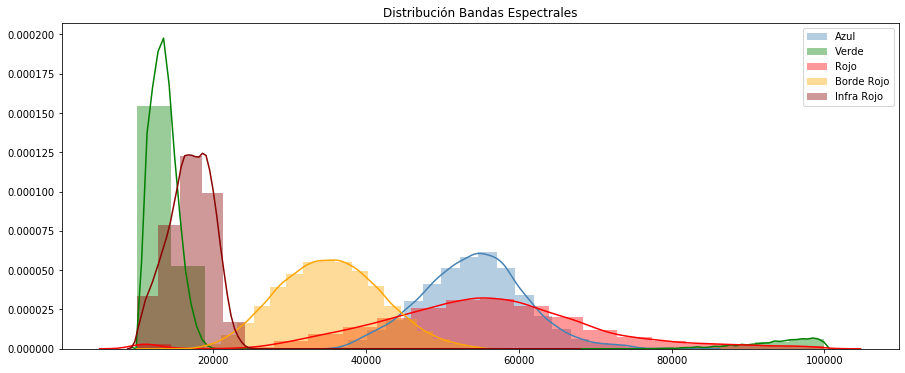

In [ ]:
#Figura distribución bandas espectrales
plt.figure(figsize=(15, 6))
sns.distplot(numericals.Azul, bins=20, norm_hist=True, label = "Azul", color="steelblue")  # Histograma banda espectral azul
sns.distplot(numericals.Verde, bins=20, norm_hist=True, label = "Verde", color="green")  # Histograma banda espectral verde
sns.distplot(numericals.Rojo, bins=20, norm_hist=True, label = "Rojo", color="red")  # Histograma banda espectral rojo
sns.distplot(numericals["Borde rojo"], bins=20, norm_hist=True, label = "Borde Rojo", color="orange")  # Histograma banda espectral borde rojo
sns.distplot(numericals["Infra Rojo"], bins=20, norm_hist=True, label = "Infra Rojo", color="darkred")  # Histograma banda espectral infra rojo
plt.legend()
plt.title("Distribución Bandas Espectrales")
plt.xlabel("")


Las bandas espectrales Borde Rojo y Azul son las que más se asemejan a una distribución normal. Particularmente, la banda espectral Azul posee una leve asimetría izquierda.

Las bandas espectrales Verde y Infra Rojo tiene exceso de curtosis por sobre una distribución normal. Por otro lado, es evidente la presencia de valores atípicos en la banda Verde.

La banda espectral Roja tiene parece tener menor curtosis que una distribución normal. Esto se observa en su punta que es más "achatada". En la cola izquierda muestra valores que podrían ser outliers.



In [ ]:
# limpieza outliers 1
#numericals_cleaned = clean_outliers(numericals, "Verde", 3)

VerdeOutliers = numericals[numericals.Verde > 40000]
len(VerdeOutliers)

numericals_cleaned = clean_outliers(numericals, "Rojo", 2.5)
print(len(numericals))
print(len(numericals) - len(numericals_cleaned))

38920
1167


Aplicando la función _clean_outliers_ sobre la banda espectral Roja, se remueven valores alejados más de 2.5 desviaciones estándar de la media de la variable. Se eliminan 1167 valores, que representan un 2.9% del largo del dataset.

Está la disyuntiva de si los valores de la cola derecha de la banda espectral Verde son o no outliers. 

Text(0.5, 1.0, 'Distirbución corregida banda espectral Roja')

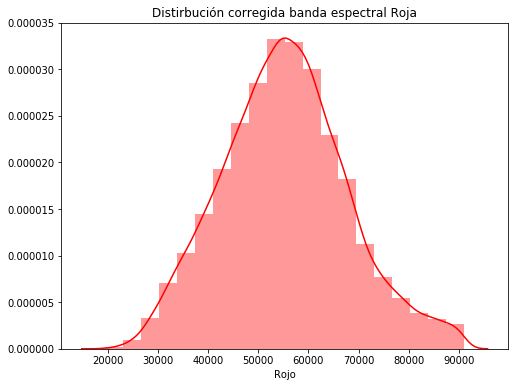

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(numericals_cleaned.Rojo, bins=20, norm_hist=True, label = "Rojo", color="red")  # Histograma banda espectral rojo
plt.title("Distirbución corregida banda espectral Roja")

_Para contrastar la hipótesis de normalidad se realizan pruebas de kolmogorov-smirnoff._

In [ ]:
azul_kgs = scipy.stats.kstest(numericals_cleaned.Azul, "norm")
verde_kgs = scipy.stats.kstest(numericals_cleaned.Verde, "norm")
rojo_kgs =scipy.stats.kstest(numericals_cleaned.Rojo, "norm")
borderojo_kgs = scipy.stats.kstest(numericals_cleaned["Borde rojo"], "norm")
infrarojo_kgs = scipy.stats.kstest(numericals_cleaned["Infra Rojo"], "norm")


print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Azul es:", azul_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Verde es:", verde_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Roja es:", rojo_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Borde Rojo es:", borderojo_kgs[1])
print("El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral InfraRojo es:", infrarojo_kgs[1])



El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Azul es: 0.0
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Verde es: 0.0
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Roja es: 0.0
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral Borde Rojo es: 0.0
El p-valor de la prueba de Komogorov Smirnoff (donde H0: la variable se distribuye normal) sobre la variable Banda Espectral InfraRojo es: 0.0


Se rechaza la hipótesis de normalidad de las distribuciones de las bandas espectrales.

__A continuación se observan las distribuciones de los índices de vegetación:__

Los índices de vegetación son combinaciones de las bandas espectrales registradas por los satélites de Teledetección, cuya función es realzar la vegetación en función de su respuesta espectral y atenuar los detalles de otros elementos como el suelo, la iluminación, el agua, etc… Se trata de imágenes calculadas a partir de operaciones algebraicas entre distintas bandas espectrales.

El resultado de estas operaciones permite obtener una nueva imagen donde se destacan gráficamente determinados píxeles relacionados con parámetros de las coberturas vegetales.

De entre todos, el NDVI (Normalized Difference Vegetation Index) es el índice de vegetación más utilizado.

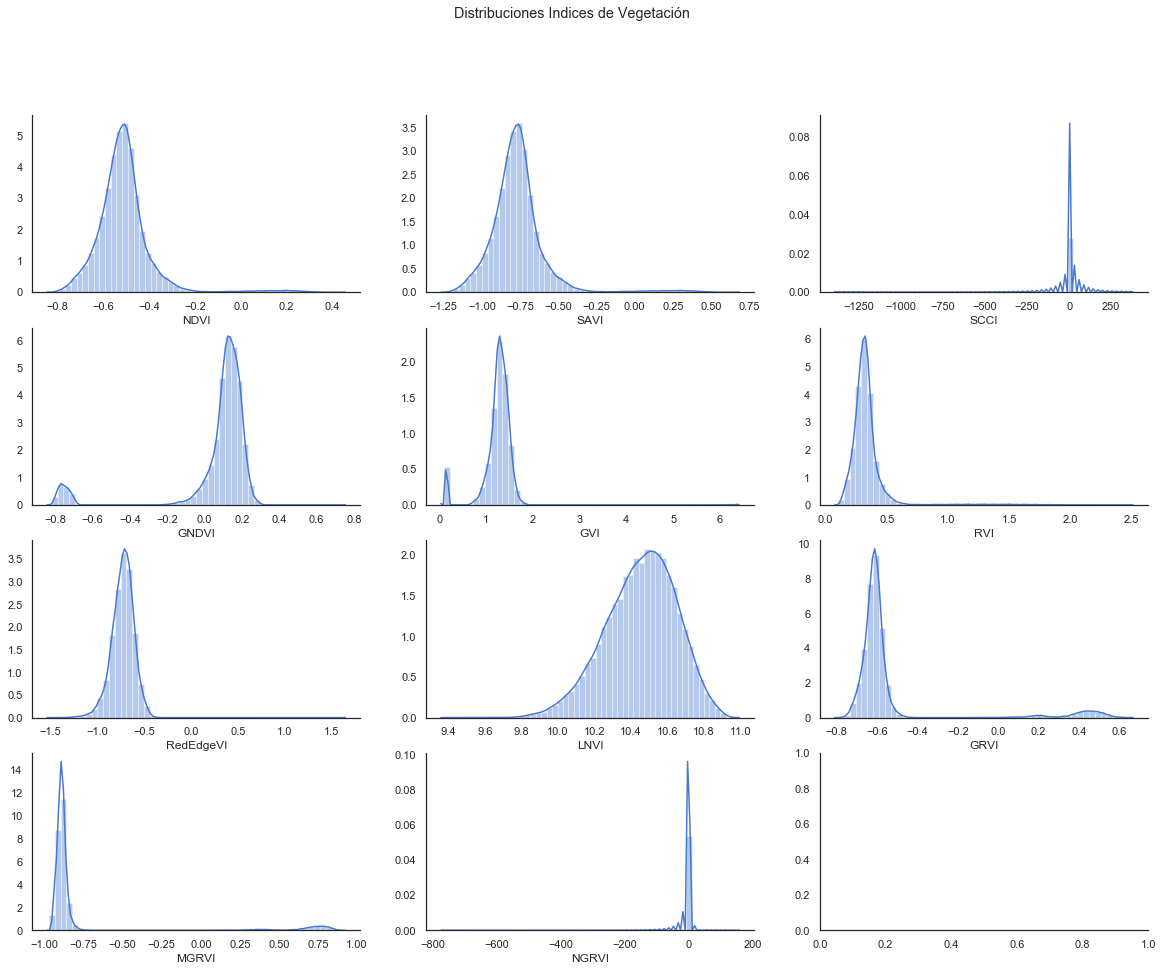

In [ ]:
#SNS SET
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.despine()
f.suptitle("Distribuciones Indices de Vegetación")
#Plots
sns.distplot(numericals.NDVI, norm_hist = True, color="b", ax=axes[0, 0])
sns.distplot(numericals.SAVI, color="b", ax=axes[0, 1])
sns.distplot(numericals.SCCI, color="b", ax=axes[0, 2])
sns.distplot(numericals.GNDVI, color="b", ax=axes[1, 0])
sns.distplot(numericals.GVI, color="b", ax=axes[1, 1])
sns.distplot(numericals.RVI, color="b", ax=axes[1, 2])
sns.distplot(numericals.RedEdgeVI, color="b", ax=axes[2, 0])
sns.distplot(numericals.LNVI, color="b", ax=axes[2, 1])
sns.distplot(numericals.GRVI, color="b", ax=axes[2, 2])
sns.distplot(numericals.MGRVI, color="b", ax=axes[3, 0])
sns.distplot(numericals.NGRVI, color="b", ax=axes[3, 1])


En general se observa que la mayoría de las distribuciónes de los índices de vegetación se asemejan a distribuciones gaussianas. Es evidente que los valores tienden a estar fuertemente concentrados alrededor de su media, por lo que sus densidades exhiben exceso de curtosis. Se observa que los índices SCCI y NGRVI tienen valores atípicos que distorsionan el análisis. Este problema se trata a continuación.

In [ ]:
numericals_gen= numericals.items()

def range(serie):
    rango = serie.max() - serie.min()
    return rango

idx = ["rango"]

rangos = [range(col) for label, col in numericals_gen]
rangos = np.array(rangos).reshape(-1,len(rangos))
rangos = pd.DataFrame(rangos, index=idx, columns=numericals.columns, dtype=None, copy=False)

rangos.iloc[0, 7:19]

Infra Rojo    56870.0000
NDVI              1.2423
NDRE              1.3003
SAVI              1.8634
SCCI           1773.2858
GNDVI             1.5452
GVI               6.2467
RVI               2.3866
RedEdgeVI         3.1042
LNVI              1.4858
GRVI              1.4430
MGRVI             1.8878
Name: rango, dtype: float64

Observando  los rangos las distribuciones y los rangos de las variables es evidente que las los índices __SCCI__ y __NGRVI__ poseen outliers.
Estos se remuven con la función _clean_outliers_. Luego, se grafican nuevamente sus distribuciones.

In [ ]:
numericals_cleaned = clean_outliers(numericals_cleaned, "SCCI", 2) 
numericals_cleaned = clean_outliers(numericals_cleaned, "NGRVI", 2) 

print(len(numericals))
print("Filas removidas:", len(numericals) - len(numericals_cleaned))

38920
Filas removidas: 3726


Text(0.5, 1.0, 'Distribución Indice SCCI')

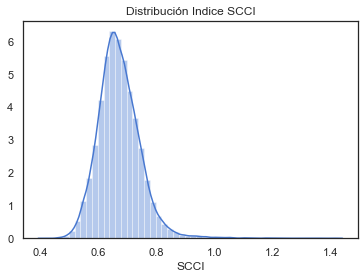

In [ ]:
sns.distplot(numericals_cleaned.SCCI, color="b")
plt.title("Distribución Indice SCCI")

Text(0.5, 1.0, 'Distribución Indice NGRVI')

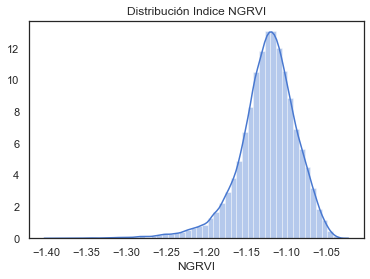

In [ ]:
sns.distplot(numericals_cleaned.NGRVI, color="b")
plt.title("Distribución Indice NGRVI")

Aplicando la función _clean_outliers_ sobre los indices SCCI y NGRVI, se remueven valores alejados más de 2 desviaciones estándar de la media de cada variable. Puede verse que, al igual que los restnates índices, los valores están moderadamente agrupados cerca de la media, es decir, estas variables están poco dispersas.

__A continuación se pueden observar las distribuciones de distintas medidas de peso de granos, la humedad y el rendimiento__

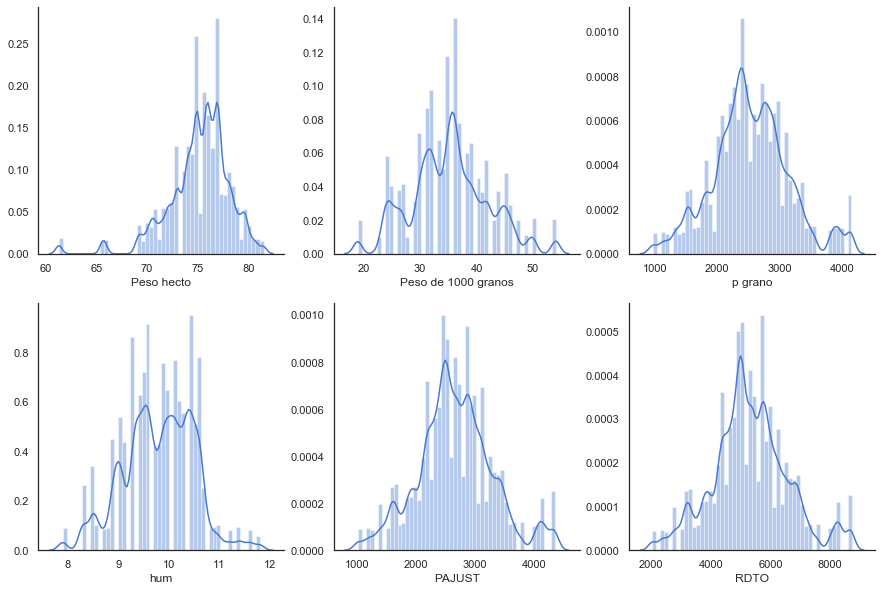

In [ ]:
# Set up the matplotlib figure
f2, axes2 = plt.subplots(2, 3, figsize=(15, 10), sharex=False)
sns.despine()
f.suptitle("Distribuciones de Medidas de Peso, Humedad y Rendimiento")

#Plots
sns.distplot(numericals["Peso hecto"], color="b", ax=axes2[0, 0])
sns.distplot(numericals["Peso de 1000 granos"], color="b", ax=axes2[0, 1])
sns.distplot(numericals["p grano"], color="b", ax=axes2[0, 2])
sns.distplot(numericals["hum"], color="b", ax=axes2[1, 0])
sns.distplot(numericals.PAJUST, color="b", ax=axes2[1, 1])
sns.distplot(numericals.RDTO, color="b", ax=axes2[1, 2])


Se puede ver que el Peso Ajustado se distribuye de forma similar al Rendimiento. Ninguna de estas variables ees normal.

La moda en las variables Altura y Vuelco son 90 y 1 respectivamente.

Finalmente, las variables _Carbon (%)_, _Aspecto_ y _Adversidades adquieren valores constantes (con pequeñas excepeciones) por lo que no parecen ser relevantes para el análisis.

Luego de remover outliers sobre algunas variables se muestran en el siguiente cuadro estadísticas descriptivas.

In [ ]:
numericals_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35194.0,10747.363301,5816.004583,1.0000,5886.0000,10677.00000,15431.0000,22613.0000
Parcela,35194.0,72.999659,42.268616,1.0000,35.0000,74.00000,110.0000,144.0000
ZADOCK,35194.0,5.777078,0.818384,3.9000,5.4000,5.90000,6.5000,6.9000
Azul,35194.0,54472.268000,5781.964836,35800.0000,50400.0000,54500.00000,58300.0000,78500.0000
Verde,35194.0,13254.115190,1742.179935,10000.0000,11940.0000,13200.00000,14410.0000,20650.0000
Rojo,35194.0,56712.104336,11656.005281,25200.0000,48700.0000,56100.00000,63900.0000,91000.0000
Borde rojo,35194.0,35918.916293,5972.752361,19180.0000,31450.0000,35590.00000,39980.0000,55230.0000
Infra Rojo,35194.0,17290.767404,2716.082922,10011.0000,15443.0000,17447.00000,19327.0000,25266.0000
NDVI,35194.0,-0.524469,0.082936,-0.7996,-0.5739,-0.52180,-0.4760,-0.1532
NDRE,35194.0,-0.348937,0.044962,-0.5323,-0.3782,-0.34680,-0.3181,-0.1853


- Cuales son las variables categoricas? Cual es la cardinalidad de las mismas?

In [ ]:
# Desde mi punto de vista Las Variables categóricas son las listadas a continuación:
df['Latitude'] = df.columna.astype(int)
df['Longitude'] = df.fila.astype(int)
cat_feature = df.columns[df.dtypes == 'object']
num_feature = df.columns[df.dtypes != 'object']

df[cat_feature].describe().T
df.describe(include='O').T

,count,unique,top,freq
Conjunto de datos,38920,2,1er Siembra,20343
Ciclos,38920,2,CC,20383
Variedad,38920,23,Variedad_K,3289
Rep,38920,3,3,13516
fila,38920,3,3,13222
columna,38920,48,11,1041
Manchas Foliares,38920,5,cero,36586
Fusariosis,38920,3,cero,33968
Fecha de espigaz?,38920,46,14/9/2015,3962
Fecha de madurez,38920,30,20/11/2015,5279


In [ ]:
#La cardinalidad de las mismas se lista a continuación:
df[cat_feature].nunique()

Conjunto de datos      2
Ciclos                 2
Variedad              23
Rep                    3
fila                   3
columna               48
Manchas Foliares       5
Fusariosis             3
Fecha de espigaz?     46
Fecha de madurez      30
dias entre fechas    28
dtype: int64

Text(0.5, 1.0, 'Cardinalidad')

C:\Users\Franco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Franco\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


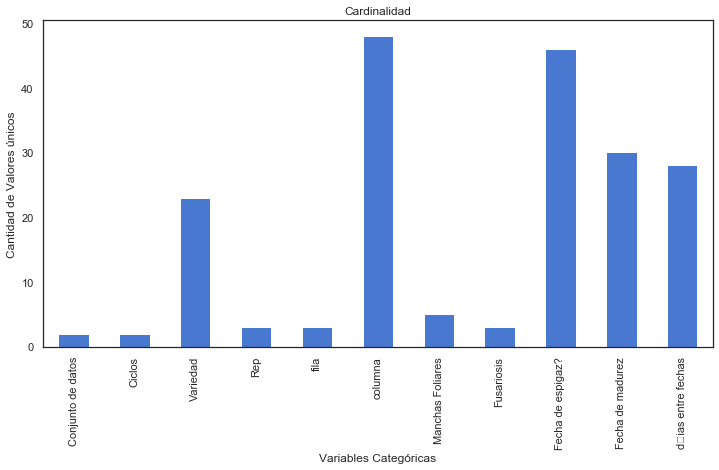

In [ ]:
df[cat_feature].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Cantidad de Valores únicos')
plt.xlabel('Variables Categóricas')
plt.title('Cardinalidad')



- Si considera que existen variables categóricas redundantes, las eliminaria

In [ ]:
# Al inicio del práctico se plantean las variables "Longitude" y "Latitude" como categóricas y desde nuestro punto de vista
# son variables continuas. Se considera que el resto de variables categóricas incluidas en el gráfico anterior no presentan
# rebundancia.

- Cuales son los 3 valores mas comunes de cada categoria?


In [ ]:
print('----------3 valores más comunes para Conjunto de Datos----------');
print(df['Conjunto de datos'].value_counts()[0:3]);
print('---------------------------------------------------------------');
      
print('----------3 valores más comunes para Ciclos----------');
print(df['Ciclos'].value_counts()[0:3]);
print('---------------------------------------------------------------');
      
print('----------3 valores más comunes para Variedad----------');
print(df['Variedad'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Rep----------');
print(df['Rep'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Parcela----------');
print(df['Parcela'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Fila----------');
print(df['fila'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Columna----------');
print(df['columna'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Manchas Foliares----------');
print(df['Manchas Foliares'].value_counts()[0:3]);
print('---------------------------------------------------------------');
      
print('----------3 valores más comunes para Fusariosis----------');
print(df['Fusariosis'].value_counts()[0:3]);
print('---------------------------------------------------------------');
      
print('----------3 valores más comunes para Fecha de Espigaz----------');
print(df['Fecha de espigaz?'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Fecha de Madurez----------');
print(df['Fecha de madurez'].value_counts()[0:3]);
print('---------------------------------------------------------------');

print('----------3 valores más comunes para Días entre Fechas----------');
print(df['dias entre fechas'].value_counts()[0:3]);
print('---------------------------------------------------------------');


----------3 valores más comunes para Conjunto de Datos----------
1er Siembra    20343
2daSiembra     18577
Name: Conjunto de datos, dtype: int64
---------------------------------------------------------------
----------3 valores más comunes para Ciclos----------
CC    20383
CL    18537
Name: Ciclos, dtype: int64
---------------------------------------------------------------
----------3 valores más comunes para Variedad----------
Variedad_K    3289
Variedad_T    3279
Variedad_Q    3136
Name: Variedad, dtype: int64
---------------------------------------------------------------
----------3 valores más comunes para Rep----------
3    13516
1    12910
2    12494
Name: Rep, dtype: int64
---------------------------------------------------------------
----------3 valores más comunes para Parcela----------
30    378
28    369
26    349
Name: Parcela, dtype: int64
---------------------------------------------------------------
----------3 valores más comunes para Fila----------
3    13222
1   

Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.

<Figure size 432x432 with 0 Axes>

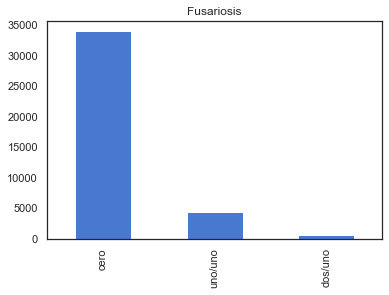

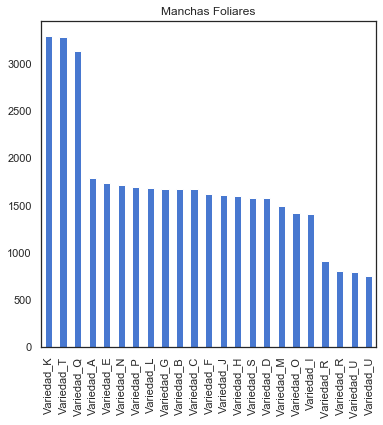

<Figure size 432x432 with 0 Axes>

In [ ]:
# Las variables escogidas son "Fusariosis" y "Manchas Foliares"
plot2 = df['Fusariosis'].value_counts().plot(kind='bar', title='Fusariosis')
plt.figure(figsize=(6,6))
 
plot222 = df['Variedad'].value_counts().plot(kind='bar', title='Manchas Foliares')
plt.figure(figsize=(6,6))

- Cuando sea posible calcule la correlacion entre cada variable y con las variables de las salidas (targets).

,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
0,1,14,1er Siembra,12203,CL,Variedad_J,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
1,1,14,1er Siembra,12204,CL,Variedad_J,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
2,1,14,1er Siembra,12205,CL,Variedad_J,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
3,1,14,1er Siembra,12206,CL,Variedad_J,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
4,1,14,1er Siembra,12207,CL,Variedad_J,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


En el siguiente gráfico podemos observar la mayoría de las muestras representan valores cero para las variables "Fusariosis" y "Manchas Foliares". Por otro lado se observa que el rendimiento no tiene dependencia sobre las variables "Fusariosis" y "Manchas Foliares". Podemos concluir de esta forma que la correlación entre el rendimiento y las otras variables es nula.


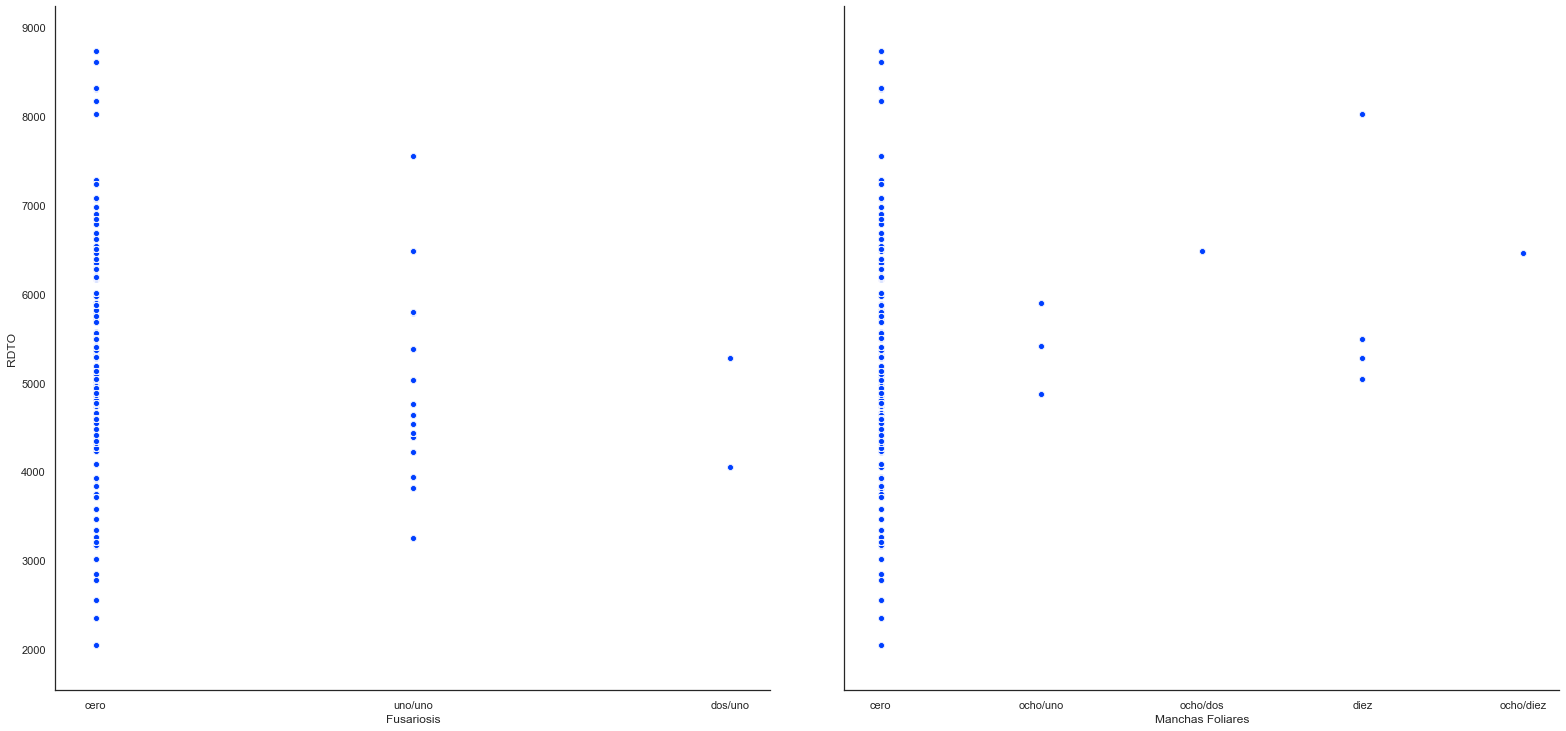

In [ ]:
import matplotlib.style as style
#Datos
display(df.head())

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-bright")

print('En el siguiente gráfico podemos observar la mayoría de las muestras representan valores cero para las variables "Fusariosis" y "Manchas Foliares". Por otro lado se observa que el rendimiento no tiene dependencia sobre las variables "Fusariosis" y "Manchas Foliares". Podemos concluir de esta forma que la correlación entre el rendimiento y las otras variables es nula.');

#Grafico
g = sns.pairplot(data=df, x_vars=["Fusariosis","Manchas Foliares"], y_vars="RDTO")
g.fig.set_size_inches(24,12)


- Cual es la variable de mayor correlacion con las de salida.

,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
0,1,14,1er Siembra,12203,CL,Variedad_J,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
1,1,14,1er Siembra,12204,CL,Variedad_J,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
2,1,14,1er Siembra,12205,CL,Variedad_J,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
3,1,14,1er Siembra,12206,CL,Variedad_J,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
4,1,14,1er Siembra,12207,CL,Variedad_J,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


Podemos observar que las variables RDTO (Rendimiento) y Peso de Grano presentan una correlación Positiva donde a mayor peso de grano mayor rendimiento.


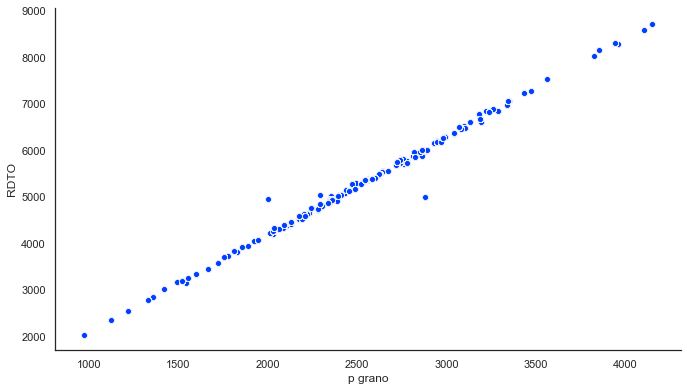

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style 

#Datos
display(df.head())

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-bright")

print('Podemos observar que las variables RDTO (Rendimiento) y Peso de Grano presentan una correlación Positiva donde a mayor peso de grano mayor rendimiento.');

#Grafico
g = sns.pairplot(data=df, x_vars=["p grano"], y_vars="RDTO")
g.fig.set_size_inches(12,6)

- Que variables estan altamente correlacionadas entre si? que se puede hacer con ellas?


In [ ]:
print('Tal como mostramos en la pregunta anterior podemos decir que el peso del grano tiene correlación positiva con el rendimiento. De esta forma sería interesante ver con que otras variables tiene correlación el Peso del Grano y obtener información para garantizar mayores rendimientos.')

Tal como mostramos en la pregunta anterior podemos decir que el peso del grano tiene correlación positiva con el rendimiento. De esta forma sería interesante ver con que otras variables tiene correlación el Peso del Grano y obtener información para garantizar mayores rendimientos.


- Escoja una variable categorica y calcule las distribuciones condicionales para cada nivel de la misma.


En este punto vamos a analizar la distribución condicional para la variable Categórica "Manchas Foliares" (MF de ahora en adelante) respecto al Rendimiento en cada uno de sus niveles. Primero podemos observar que cuando MF= Cero, el rendimiento no presenta un patrón que nos permita deducir que tiene impacto directo en el mismo. Podemos hacer la misma observación cuando MF= ocho/uno, MF=ocho/dos, MF= diez y MF=ocho/diez. Luego si analizamos la media de cada uno de los niveles de esta variable categótica observamos el mismo patrón. De esta forma concluimos que la correlación entre estas variables es nula. .


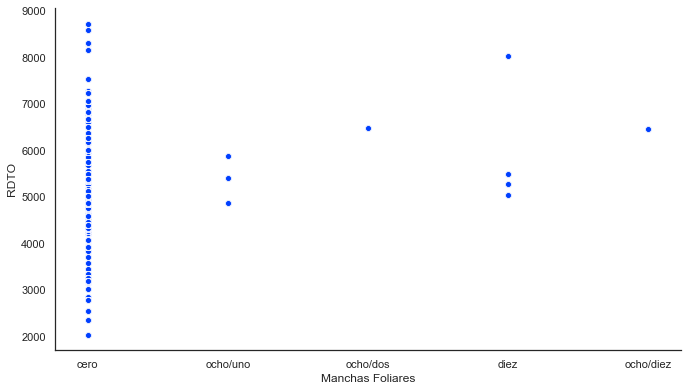

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style 

#Estilo del gráfico
sns.set_context("notebook")
style.use("seaborn-bright")

print('En este punto vamos a analizar la distribución condicional para la variable Categórica "Manchas Foliares" (MF de ahora en adelante) respecto al Rendimiento en cada uno de sus niveles. Primero podemos observar que cuando MF= Cero, el rendimiento no presenta un patrón que nos permita deducir que tiene impacto directo en el mismo. Podemos hacer la misma observación cuando MF= ocho/uno, MF=ocho/dos, MF= diez y MF=ocho/diez. Luego si analizamos la media de cada uno de los niveles de esta variable categótica observamos el mismo patrón. De esta forma concluimos que la correlación entre estas variables es nula. .');

#Grafico
g = sns.pairplot(data=df, x_vars=["Manchas Foliares"], y_vars="RDTO")
g.fig.set_size_inches(12,6)



- Como podemos saber si las distribuciones condicionales son diferentes entre ellas?



# Distribución de los rendimientos por parcelas, filas y columnas:
- Distribución por parcelas

In [ ]:
df_rdto = df.loc[:, ["Parcela", "fila", "columna", "RDTO"]]

df_parc_gb = df_rdto.groupby("Parcela").RDTO.describe()
df_parc_gb

,count,mean,std,min,25%,50%,75%,max
Parcela,,,,,,,,
1,278.0,5567.000000,0.000000,5567.0,5567.0,5567.0,5567.0,5567.0
2,293.0,4959.000000,0.000000,4959.0,4959.0,4959.0,4959.0,4959.0
3,260.0,6532.000000,0.000000,6532.0,6532.0,6532.0,6532.0,6532.0
4,312.0,7281.000000,0.000000,7281.0,7281.0,7281.0,7281.0,7281.0
5,330.0,8725.000000,0.000000,8725.0,8725.0,8725.0,8725.0,8725.0
6,278.0,6349.000000,0.000000,6349.0,6349.0,6349.0,6349.0,6349.0
7,313.0,7542.000000,0.000000,7542.0,7542.0,7542.0,7542.0,7542.0
8,305.0,5713.000000,0.000000,5713.0,5713.0,5713.0,5713.0,5713.0
9,322.0,6855.000000,0.000000,6855.0,6855.0,6855.0,6855.0,6855.0


La mayor parte de las parcelas poseen una (función) distribución constante, es decir, asumen un único valor. Esto puede verse en las parcelas cuyo rendimiento medio, máximo y mínimo es idéntico, o en otras palabras, la desviación estándar del rendimiento es cero.

Excepciones a este caso suceden en las parcelas 59 a 64, 66 a 71 y 107 a 144, esto es, en un 32% de las parcelas, los rendimientos no asumen un valor constante. Sin embargo los rendimientos tienden a estar fuertemente agrupados, en tanto todas concentran al menos el 75% de las observaciones en un mismo punto (como puede verse a partir de los valores máximos y mínimos y los cuantiles 25 y 75). De esto puede deducirse que es _posible_ que las parcelas cuyos rendimientos no asumen un valor fijo posean observciones atípicas.

- Distribución por Filas:

In [ ]:
#Distribución por filas: Hay únicamente 3 filas.
df_fila1 = df_rdto[df_rdto.fila == "1"]
df_fila2 = df_rdto[df_rdto.fila == "2"]
df_fila3 = df_rdto[df_rdto.fila == "3"]

Text(0.5, 1.0, 'Distribución de los Rendimientos por Filas')

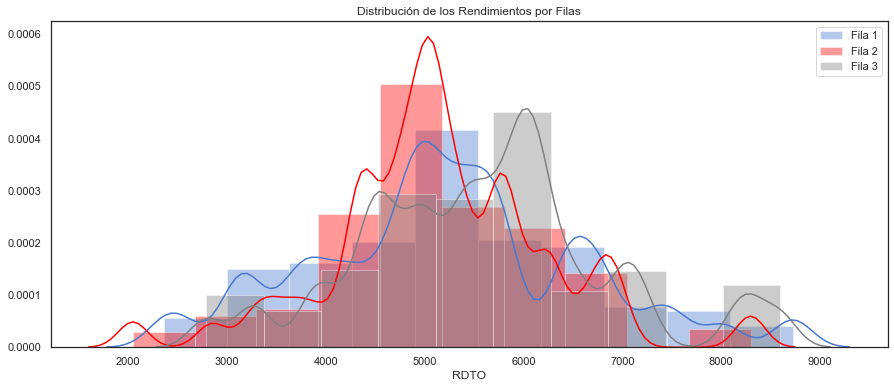

In [ ]:
plt.figure(figsize= (15, 6))
sns.distplot(df_fila1.RDTO, color="b", bins = 10, label= "Fila 1")
sns.distplot(df_fila2.RDTO, color="red", bins= 10, label = "Fila 2")
sns.distplot(df_fila3.RDTO, color="grey", bins= 10, label = "Fila 3")
plt.legend()
plt.title("Distribución de los Rendimientos por Filas")

In [ ]:
print("El rendimiento medio de la Fila 1 es:", round(df_fila1.RDTO.mean(), 2), ", y la desviación estandar es de:", round(df_fila1.RDTO.std(), 2))
print("El rendimiento medio de la Fila 2 es:", round(df_fila2.RDTO.mean(), 2), ", y la desviación estandar es de:", round(df_fila2.RDTO.std(), 2))
print("El rendimiento medio de la Fila 3 es:", round(df_fila3.RDTO.mean(), 2), ", y la desviación estandar es de:", round(df_fila3.RDTO.std(), 2))

El rendimiento medio de la Fila 1 es: 5236.46 , y la desviación estandar es de: 1382.09
El rendimiento medio de la Fila 2 es: 5153.32 , y la desviación estandar es de: 1095.65
El rendimiento medio de la Fila 3 es: 5582.64 , y la desviación estandar es de: 1255.6


Se observa que en promedio la fila 3 fue la de mayor rendimiento, seguido de las filas 1 y 2 respectivamente. Por otro lado, la menor variabilidad la muestra la fila 2.

- Distribución por columna

In [ ]:
#Distribución por columna: Hay 48 columnas.
#print(len(df_rdto.columna.value_counts()))
df_columna_gb = df_rdto.groupby("columna").RDTO.describe()
df_columna_gb.sort_values("mean")
df_columna_gb_mean = df_columna_gb["mean"]
#df_columna_gb_mean.mean()


In [ ]:
print("El rendimiento promedio de las columnas (promedio de los promedios de cada columna) es de:", round(df_columna_gb_mean.mean(), 2))

El rendimiento promedio de las columnas (promedio de los promedios de cada columna) es de: 5299.67


En tanto a la distribución de las columnas, se observa que la columna con mayor rendimiento promedio fue la número 18, en tanto la de peor rendimiento fue la número 43. Por otro lado, la de menor variabilidad fue la columna 26 y la de mayor variabilidad fue la 11. 

- Distribución Bandas Espectrales por Parcelas

In [ ]:
df_parc_bandas = df.loc[:, ["Parcela", "Azul", "Verde", "Rojo", "Borde rojo", "Infra Rojo"]]

df_Azul_gb = df_parc_bandas.groupby("Parcela").Azul.describe()
df_Verde_gb = df_parc_bandas.groupby("Parcela").Verde.describe()
df_Rojo_gb = df_parc_bandas.groupby("Parcela").Rojo.describe()
df_BR_gb = df_parc_bandas.groupby("Parcela")["Borde rojo"].describe()
df_IR_gb = df_parc_bandas.groupby("Parcela")["Infra Rojo"].describe()



print("El valor promedio de la banda espectral Azul entre las 144 parcelas es de:", round(df_Azul_gb["mean"].mean(),2))
print("El valor promedio de la banda espectral Verde entre las 144 parcelas es de:", round(df_Verde_gb["mean"].mean(),2))
print("El valor promedio de la banda espectral Roja entre las 144 parcelas es de:", round(df_Rojo_gb["mean"].mean(),2))
print("El valor promedio de la banda espectral Borde Rojo entre las 144 parcelas es de:", round(df_BR_gb["mean"].mean(),2))
print("El valor promedio de la banda espectral Infra Rojo entre las 144 parcelas es de:", round(df_IR_gb["mean"].mean(),2))

El valor promedio de la banda espectral Azul entre las 144 parcelas es de: 54293.34
El valor promedio de la banda espectral Verde entre las 144 parcelas es de: 18459.79
El valor promedio de la banda espectral Roja entre las 144 parcelas es de: 55607.84
El valor promedio de la banda espectral Borde Rojo entre las 144 parcelas es de: 35387.81
El valor promedio de la banda espectral Infra Rojo entre las 144 parcelas es de: 16978.99


A continuación puede verse la distribución de las bandas espectrales para una parcela aleatoria entre las 144 existentes

Text(0.5, 0, '')

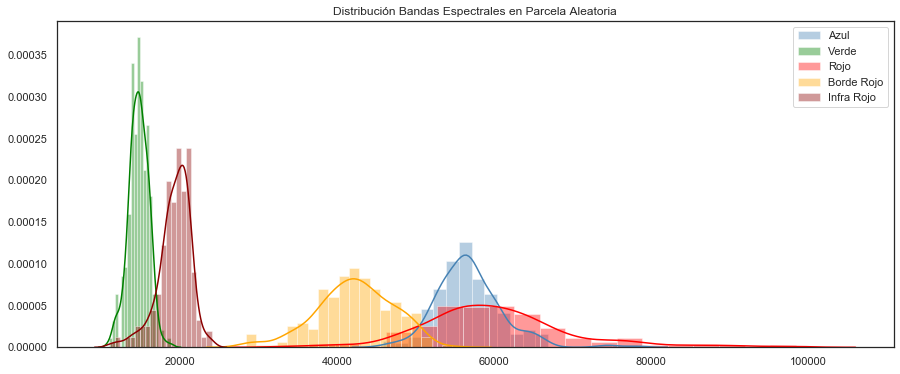

In [ ]:
import random
bandas_parcA = df_parc_bandas[df_parc_bandas.Parcela == random.randint(0,144)]

#Distribución bandas espectrales en parcela aleatoria
plt.figure(figsize=(15, 6))
sns.distplot(bandas_parcA.Azul, bins=20, norm_hist=True, label = "Azul", color="steelblue")  # Histograma banda espectral azul
sns.distplot(bandas_parcA.Verde, bins=20, norm_hist=True, label = "Verde", color="green")  # Histograma banda espectral verde
sns.distplot(bandas_parcA.Rojo, bins=20, norm_hist=True, label = "Rojo", color="red")  # Histograma banda espectral rojo
sns.distplot(bandas_parcA["Borde rojo"], bins=20, norm_hist=True, label = "Borde Rojo", color="orange")  # Histograma banda espectral borde rojo
sns.distplot(bandas_parcA["Infra Rojo"], bins=20, norm_hist=True, label = "Infra Rojo", color="darkred")  # Histograma banda espectral infra rojo
plt.legend()
plt.title("Distribución Bandas Espectrales en Parcela Aleatoria")
plt.xlabel("")



Ejectunado el código anterior en repetidas ocasiones se observa que las distribuciones de las bandas espectrales en cada parcela particular son similares a las distribuciones agregadas.

## Distribución Indices de Vegetación por Parcelas

In [ ]:
df_parc_indices = df.loc[:, ["Parcela", "NDVI", "NDRE", "SAVI", "SCCI", "GNDVI", "GVI", "RVI", "RedEdgeVI", "LNVI", "GRVI", "MGRVI", "NGRVI"]]

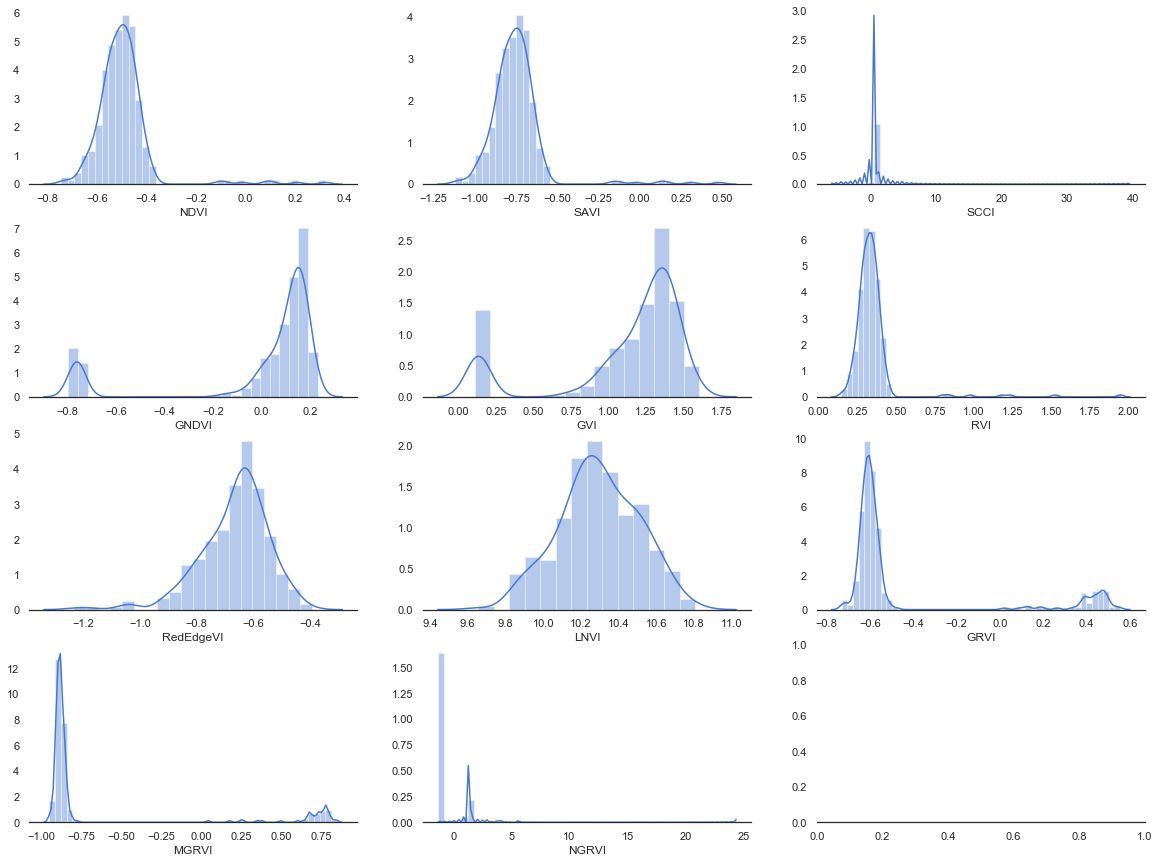

In [ ]:
indices_parcA = df_parc_indices[df_parc_indices.Parcela == random.randint(0,144)]


g, axs = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.despine(left=True)
f.suptitle("Distribuciones Indices de Vegetación en Parcela Aleatoria")

#Plots
sns.distplot(indices_parcA.NDVI, color="b", ax=axs[0, 0])
sns.distplot(indices_parcA.SAVI, color="b", ax=axs[0, 1])
sns.distplot(indices_parcA.SCCI, color="b", ax=axs[0, 2])
sns.distplot(indices_parcA.GNDVI, color="b", ax=axs[1, 0])
sns.distplot(indices_parcA.GVI, color="b", ax=axs[1, 1])
sns.distplot(indices_parcA.RVI, color="b", ax=axs[1, 2])
sns.distplot(indices_parcA.RedEdgeVI, color="b", ax=axs[2, 0])
sns.distplot(indices_parcA.LNVI, color="b", ax=axs[2, 1])
sns.distplot(indices_parcA.GRVI, color="b", ax=axs[2, 2])
sns.distplot(indices_parcA.MGRVI, color="b", ax=axs[3, 0])
sns.distplot(indices_parcA.NGRVI, color="b", ax=axs[3, 1])


Como en el caso agregado, tomando una parcela aleatoria, la mayor parte de distribuciones de los índices de vegetación tienen forma de campanas gaussianas, pero no un comportamiento puro de distriubución normal. Puede decirse que las distribuciones de los índices SCCI y NGRVI se muestran más suavizadas que las observadas en los caso generales. Esto sucede porque la dispersión es menor en parcelas específicas, es decir, el rango de estas variables se reduce.

In [ ]:
numericals_cleaned.describe()

,ID,Parcela,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Carbon (%),Adversidades,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
count,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000
mean,10747.363301,72.999659,5.777078,54472.268000,13254.115190,56712.104336,35918.916293,17290.767404,-0.524469,-0.348937,-0.786698,0.672362,0.129448,1.309352,0.315874,-0.730337,10.475171,-0.615337,-0.890445,-1.124203,0.596920,0.114878,0.342544,1.861411,83.909104,2.736503,75.170043,35.193726,2555.933824,9.786083,2684.624624,5359.589760
std,5816.004583,42.268616,0.818384,5781.964836,1742.179935,11656.005281,5972.752361,2716.082922,0.082936,0.044962,0.124404,0.072909,0.063763,0.164283,0.072759,0.103207,0.166898,0.042558,0.028338,0.036794,0.683806,0.936062,1.489866,0.882142,9.403286,0.667899,3.046166,6.830030,597.791173,0.686919,628.472155,1255.056582
min,1.000000,1.000000,3.900000,35800.000000,10000.000000,25200.000000,19180.000000,10011.000000,-0.799600,-0.532300,-1.199400,0.419400,-0.175100,0.702000,0.111400,-1.186800,9.861600,-0.769200,-0.966500,-1.390800,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,61.300000,19.000000,970.000000,7.900000,1023.000000,2046.000000
25%,5886.000000,35.000000,5.400000,50400.000000,11940.000000,48700.000000,31450.000000,15443.000000,-0.573900,-0.378200,-0.860900,0.625200,0.094900,1.209700,0.270700,-0.795900,10.356200,-0.641000,-0.908700,-1.142700,0.000000,0.000000,0.000000,1.000000,75.000000,2.000000,73.800000,31.000000,2200.000000,9.300000,2303.000000,4605.000000
50%,10677.000000,74.000000,5.900000,54500.000000,13200.000000,56100.000000,35590.000000,17447.000000,-0.521800,-0.346800,-0.782800,0.666000,0.134300,1.310100,0.314200,-0.723500,10.479800,-0.614250,-0.892000,-1.121100,1.000000,0.000000,0.000000,2.000000,85.000000,3.000000,75.700000,35.000000,2530.000000,9.800000,2665.000000,5309.000000
75%,15431.000000,110.000000,6.500000,58300.000000,14410.000000,63900.000000,39980.000000,19327.000000,-0.476000,-0.318100,-0.714000,0.713400,0.173300,1.419300,0.355000,-0.659100,10.596100,-0.589700,-0.875100,-1.100500,1.000000,0.000000,0.000000,2.000000,90.000000,3.000000,77.000000,39.000000,2890.000000,10.300000,3083.000000,6009.000000
max,22613.000000,144.000000,6.900000,78500.000000,20650.000000,91000.000000,55230.000000,25266.000000,-0.153200,-0.185300,-0.229800,1.416100,0.311300,1.904200,0.734300,-0.374900,10.919300,-0.424200,-0.719000,-1.034600,3.000000,10.000000,10.000000,4.500000,105.000000,4.500000,81.500000,54.000000,4150.000000,11.800000,4362.000000,8725.000000


### Datos del  Diseño Experimental

En cuanto al diseño experimental, se considera como importante la identificacion del cultviar, y la fecha de siembra y la parcela, las repeticiones son ultiles al momento de calcular el promedio de los cultivares para las estimaciones.

Tambien tomamos la variable ZADOCK, se va a trabajar como variable categorica y no continua, ya que se valor describe un momento fenologico de la vegetacion, y al ser una escala sus valores son discretos. Por ejemplo un valor de 5.5 Significa que la planta de trigo se encuentra el estadio de Espigazon con la mitad de la inflorescencia visible, mientras que un valor 5.9 significa que tiene toda inflorescencia visible. 


In [ ]:
#Transformacion de ZADOCK a Variable Categorica
numericals_cleaned['ZADOCK_Cat'] = df.ZADOCK.astype('category')

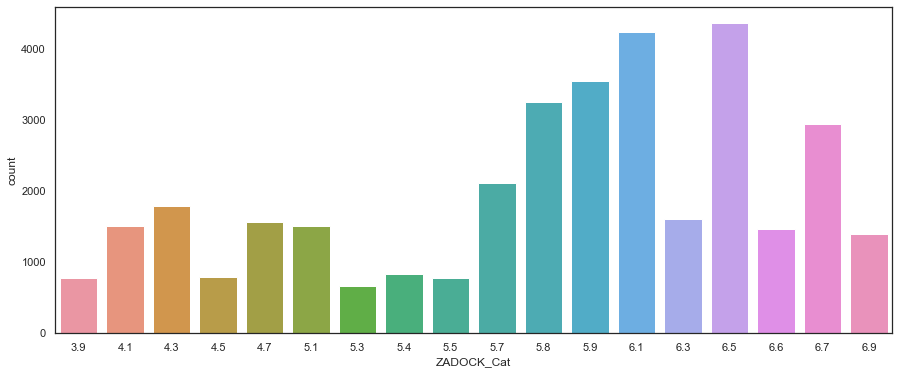

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=numericals_cleaned, x='ZADOCK_Cat')

Del grafico anterior podemos observar que los estados fenologicos que presento la vegetacion al momento de la toma de la imagen fueron de 3.9 (Ligula de la hoja bandera visible) a 6.9 (Antensis completa), presentandose la mayor cantidad de plantas en los estadios 6.1(comienzo de antesis) y 6.5 (mitad de antesis.

- ¿Cómo se correlacionan la escala de ZADOKS y las bandas expectrales? Explorar las métricas o estadísticos dentro de cada clase y compararlas.

In [ ]:
Zadock_bandas=numericals_cleaned.loc[:, ["Azul", "Verde", "Rojo", "Borde rojo", "Infra Rojo","ZADOCK_Cat"]]
Zadock_bandas.groupby(["ZADOCK_Cat"]).describe().T

ZADOCK_Cat                 3.9           4.1           4.3           4.5  \
Azul       count    779.000000   1517.000000   1793.000000    798.000000   
           mean   56506.290116  55732.630191  50640.713887  52407.518797   
           std     4698.345054   5030.152802   5437.536324   5045.657895   
           min    42600.000000  40700.000000  37500.000000  41600.000000   
           25%    53250.000000  52200.000000  46600.000000  49100.000000   
           50%    56600.000000  55800.000000  50300.000000  51700.000000   
           75%    59400.000000  59100.000000  54200.000000  54800.000000   
           max    73500.000000  74800.000000  71300.000000  73300.000000   
Verde      count    779.000000   1517.000000   1793.000000    798.000000   
           mean   14483.607189  14370.059328  12061.706637  12622.468672   
           std     1931.102674   2199.665286   1449.474000   1228.447131   
           min    10090.000000  10010.000000  10000.000000  10050.000000   
           25%    13155.000000  12720.000000  10790.000000  11700.000000   
           50%    14420.000000  14180.000000  11900.000000  12520.000000   
           75%    15725.000000  16060.000000  13050.000000  13380.000000   
           max    20650.000000  20300.000000  18010.000000  17090.000000   
Rojo       count    779.000000   1517.000000   1793.000000    798.000000   
           mean   60860.205392  58649.307844  51315.950920  53492.857143   
           std     8672.073962   9167.446700  11118.351339  10189.543025   
           min    37800.000000  35600.000000  29600.000000  32600.000000   
           25%    54950.000000  52300.000000  43300.000000  46625.000000   
           50%    60800.000000  58500.000000  50600.000000  52000.000000   
           75%    65800.000000  65100.000000  57600.000000  57700.000000   
           max    91000.000000  90300.000000  90700.000000  90800.000000   
Borde rojo count    779.000000   1517.000000   1793.000000    798.000000   
           mean   40641.732991  40169.815425  33319.258226  35369.373434   
           std     5986.616968   6820.946115   4535.643013   4230.260838   
           min    26100.000000  21830.000000  23420.000000  24550.000000   
           25%    36505.000000  35220.000000  29760.000000  32297.500000   
           50%    40870.000000  39800.000000  32770.000000  35340.000000   
           75%    44675.000000  45510.000000  36430.000000  38065.000000   
           max    55080.000000  55230.000000  52660.000000  48540.000000   
Infra Rojo count    779.000000   1517.000000   1793.000000    798.000000   
           mean   18749.863928  18610.121951  17095.920245  17693.714286   
           std     2523.266820   2519.769038   2301.111783   2239.398175   
           min    11157.000000  11002.000000  11072.000000  11109.000000   
           25%    17293.000000  17197.000000  15758.000000  16547.750000   
           50%    19193.000000  19076.000000  17426.000000  17950.000000   
           75%    20572.500000  20463.000000  18713.000000  19209.000000   
           max    23708.000000  24079.000000  23418.000000  23942.000000   

ZADOCK_Cat                 4.7           5.1           5.3           5.4  \
Azul       count   1566.000000   1504.000000    664.000000    830.000000   
           mean   53201.724138  53961.502660  51509.337349  52363.253012   
           std     4923.319054   5254.133816   5954.797312   6607.159659   
           min    40900.000000  40100.000000  39200.000000  39100.000000   
           25%    49700.000000  50300.000000  46800.000000  46100.000000   
           50%    52700.000000  53900.000000  51100.000000  53350.000000   
           75%    56100.000000  57500.000000  56825.000000  57500.000000   
           max    72500.000000  75300.000000  65100.000000  67700.000000   
Verde      count   1566.000000   1504.000000    664.000000    830.000000   
           mean   12874.629630  13396.023936  12217.635542  13101.831325   
           std     1794.145882   1693.347797   

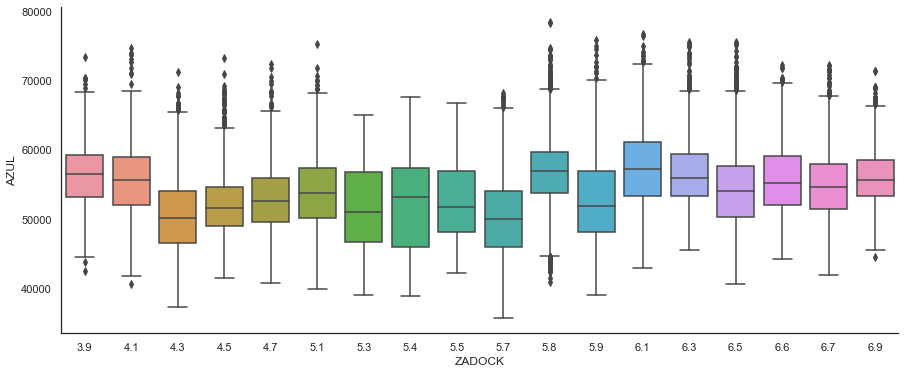

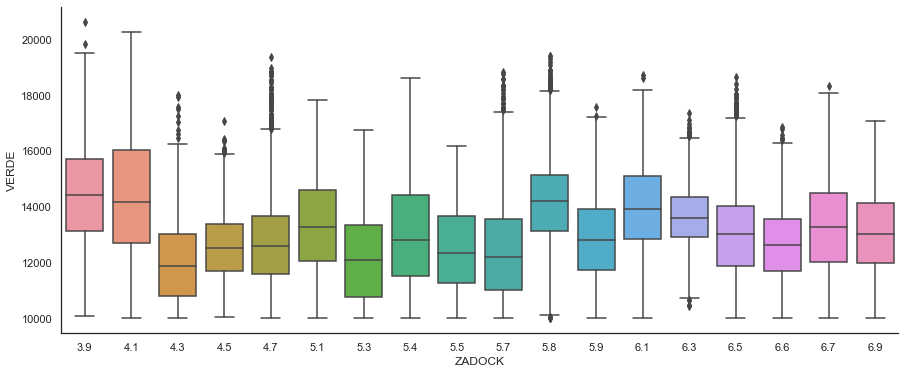

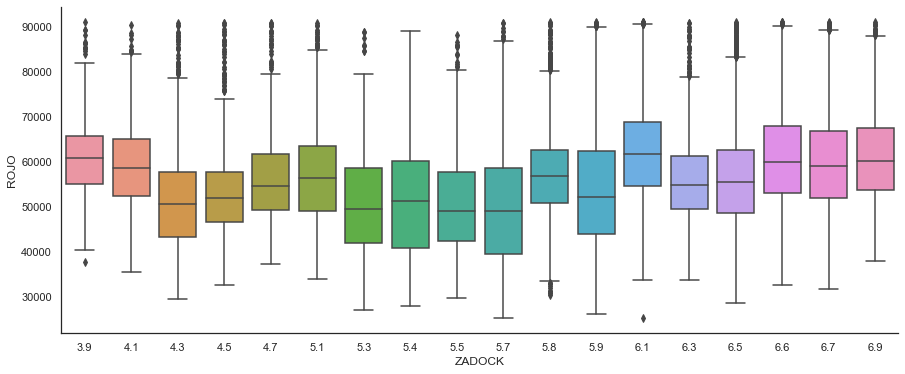

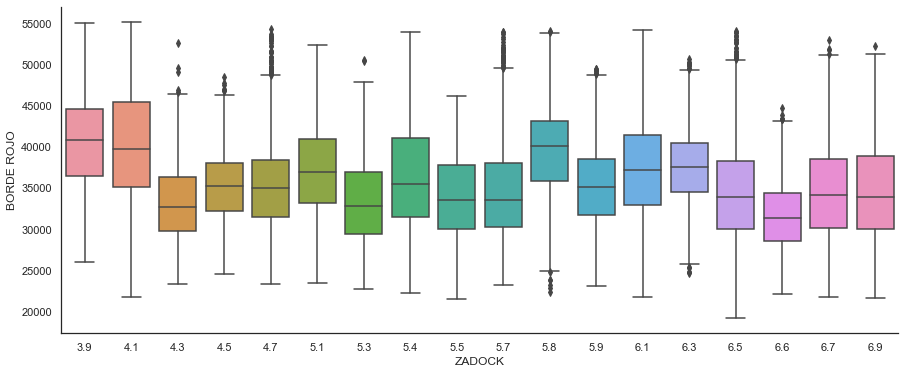

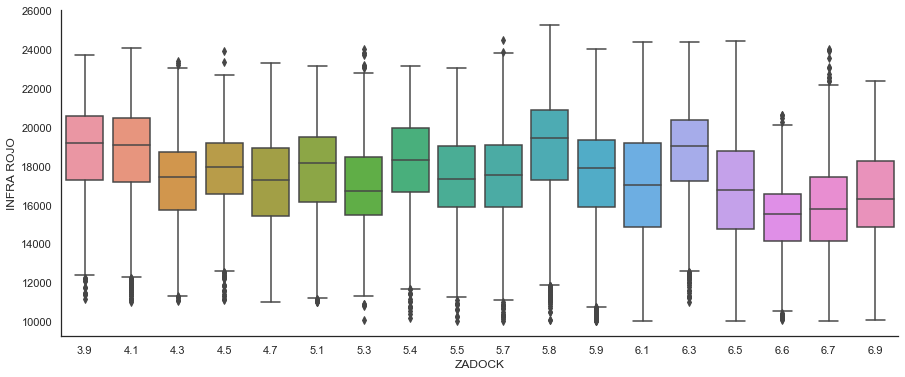

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_bandas,x='ZADOCK_Cat', y=('Azul'))
plt.ylabel('AZUL')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_bandas,x='ZADOCK_Cat', y=('Verde'))
plt.ylabel('VERDE')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_bandas,x='ZADOCK_Cat', y=('Rojo'))
plt.ylabel('ROJO')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_bandas,x='ZADOCK_Cat', y=('Borde rojo'))
plt.ylabel('BORDE ROJO')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_bandas,x='ZADOCK_Cat', y=('Infra Rojo'))
plt.ylabel('INFRA ROJO')
plt.xlabel('ZADOCK')
sns.despine()


Mediante los graficos anteriores, y la tabla podemos ver como se distrubuyen los valores de las bandas espectrales en cada valor de la escala ZADOCK. PAra el caso de la banda azul, se observa que el valor 3.9, 5.8 y 6.1 de la escala presentan las mayores medias, dando el mayor valor de esta banda espectral en 6.1 mientras que el minimo ocurre en 5.7.
En cuanto a la banda verde, el mayor valor de la mediana se vio en el valor de la escala zadokc en 3.9, y el maximo de esta banda se da en 4.1 y el minimo se ve bastante parejo. PAra el caso de la banda Rojo los valores de mayor mediana se dan en 3.9 y 6.9. Para el caso de la banda Borde rojo se da en 3.9 y para la banda infrarroja en 3.9 y 5.8. 

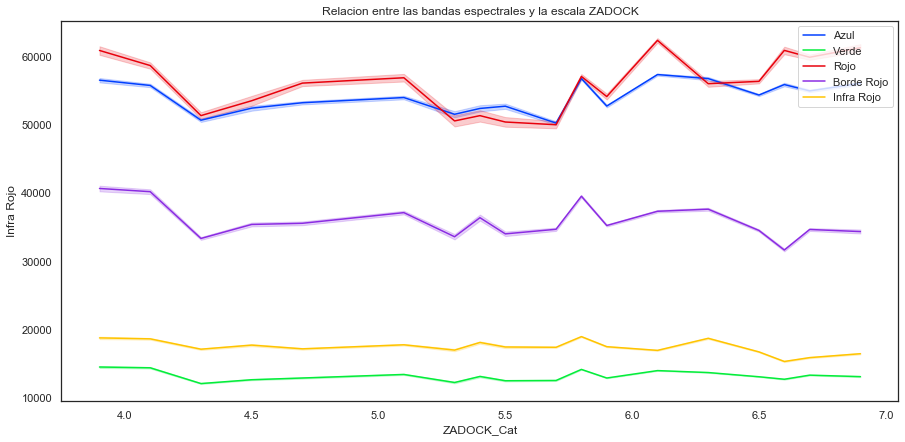

In [ ]:
plt.figure(figsize=(15, 7))
plt.title('Relacion entre las bandas espectrales y la escala ZADOCK')
sns.lineplot(data=Zadock_bandas, x='ZADOCK_Cat', y='Azul',label='Azul')
sns.lineplot(data=Zadock_bandas, x='ZADOCK_Cat', y='Verde', label='Verde')
sns.lineplot(data=Zadock_bandas, x='ZADOCK_Cat', y='Rojo',label='Rojo')
sns.lineplot(data=Zadock_bandas, x='ZADOCK_Cat', y='Borde rojo',label= 'Borde Rojo')
sns.lineplot(data=Zadock_bandas, x='ZADOCK_Cat', y='Infra Rojo', label='Infra Rojo')
plt.legend(loc=1)


En el grafico anterior, se observa que no existe una tendencia clara en cuanto a los valores de los indices y el aumento fenologico de las plantas. 

- ¿Cómo se correlacionan la escala de ZADOKS y los índices expectrales? Explorar las métricas o estadísticos dentro de cada clase y compararlas.

In [ ]:
Zadock_indices=numericals_cleaned.loc[:, ["NDVI", "NDRE", "SAVI", "SCCI", "GNDVI", "GVI", "RVI", "RedEdgeVI", "LNVI", "GRVI", "MGRVI", "NGRVI","ZADOCK_Cat"]]
Zadock_indices.groupby(["ZADOCK_Cat"]).describe().T

ZADOCK_Cat              3.9          4.1          4.3         4.5  \
NDVI      count  779.000000  1517.000000  1793.000000  798.000000   
          mean    -0.527169    -0.515309    -0.489387   -0.496254   
          std      0.045409     0.052340     0.092746    0.069469   
          min     -0.726500    -0.757000    -0.770800   -0.763500   
          25%     -0.546400    -0.539600    -0.543900   -0.527950   
          50%     -0.522400    -0.511000    -0.489500   -0.485500   
          75%     -0.498100    -0.485000    -0.437300   -0.450025   
          max     -0.429400    -0.381300    -0.250400   -0.324700   
NDRE      count  779.000000  1517.000000  1793.000000  798.000000   
          mean    -0.367528    -0.364026    -0.321339   -0.333277   
          std      0.035989     0.041434     0.045076    0.035136   
          min     -0.464200    -0.476600    -0.489100   -0.506500   
          25%     -0.394500    -0.396900    -0.348900   -0.346200   
          50%     -0.375500    -0.370400    -0.320400   -0.325350   
          75%     -0.335450    -0.331300    -0.291400   -0.310600   
          max     -0.286600    -0.244200    -0.185300   -0.267500   
SAVI      count  779.000000  1517.000000  1793.000000  798.000000   
          mean    -0.790749    -0.772960    -0.734074   -0.744374   
          std      0.068115     0.078509     0.139118    0.104202   
          min     -1.089800    -1.135400    -1.156200   -1.145300   
          25%     -0.819600    -0.809400    -0.815800   -0.791850   
          50%     -0.783600    -0.766500    -0.734300   -0.728300   
          75%     -0.747150    -0.727500    -0.656000   -0.675025   
          max     -0.644200    -0.571900    -0.375600   -0.487100   
SCCI      count  779.000000  1517.000000  1793.000000  798.000000   
          mean     0.698132     0.708311     0.665535    0.676182   
          std      0.051754     0.066099     0.064322    0.049734   
          min      0.582000     0.465600     0.502000    0.544200   
          25%      0.654900     0.657100     0.624200    0.640200   
          50%      0.698600     0.705400     0.659900    0.673500   
          75%      0.738500     0.761300     0.697600    0.706800   
          max      0.844300     0.866900     0.934200    0.919700   
GNDVI     count  779.000000  1517.000000  1793.000000  798.000000   
          mean     0.127631     0.128963     0.170695    0.164948   
          std      0.047792     0.054102     0.061700    0.051535   
          min     -0.065100    -0.090300    -0.063800   -0.083900   
          25%      0.099200     0.094000     0.138400    0.149800   
          50%      0.126800     0.122700     0.175900    0.181400   
          75%      0.169050     0.173000     0.211300    0.197350   
          max      0.222300     0.260100     0.304900    0.244200   
GVI       count  779.000000  1517.000000  1793.000000  798.000000   
          mean     1.299287     1.304956     1.424656    1.403395   
          std      0.122476     0.142898     0.175753    0.135619   
          min      0.877800     0.834400     0.880000    0.845100   
          25%      1.220300     1.207600     1.321300    1.352400   
          50%      1.290400     1.279600     1.427000    1.443200   
          75%      1.406900     1.418500     1.535700    1.491725   
          max      1.571600     1.703000     1.877200    1.646300   
RVI       count  779.000000  1517.000000  1793.000000  798.000000   
          mean     0.310733     0.321403     0.348087    0.339448   
          std      0.037725     0.044725     0.084713    0.060006   
          min      0.158400     0.138300     0.129400    0.134100   
          25%      0.293350     0.299000     0.295500    0.308950   
          50%      0.313700     0.323600     0.342700    0.346350   
          75%      0.335000     0.346800     0.391500    0.379300   
          max      0.399100     0.448000     0.599500    0.509800   
RedEdgeVI count  779.000000  1517.000000  1793.000000  798.000000  

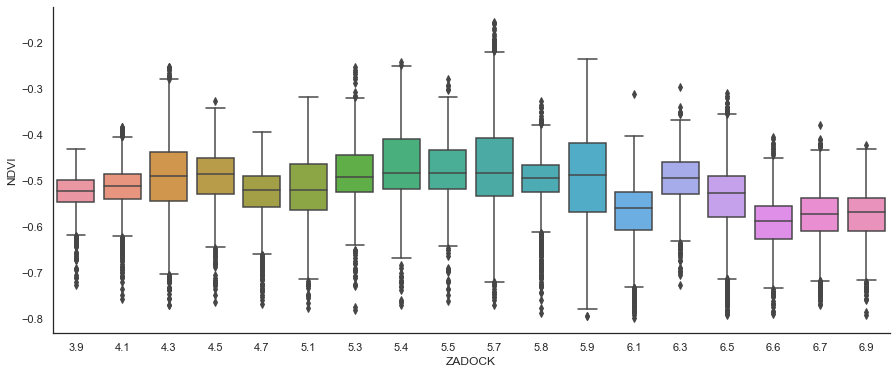

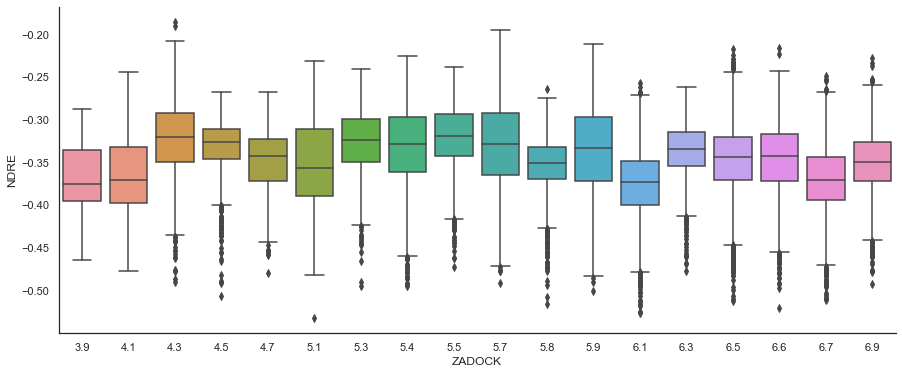

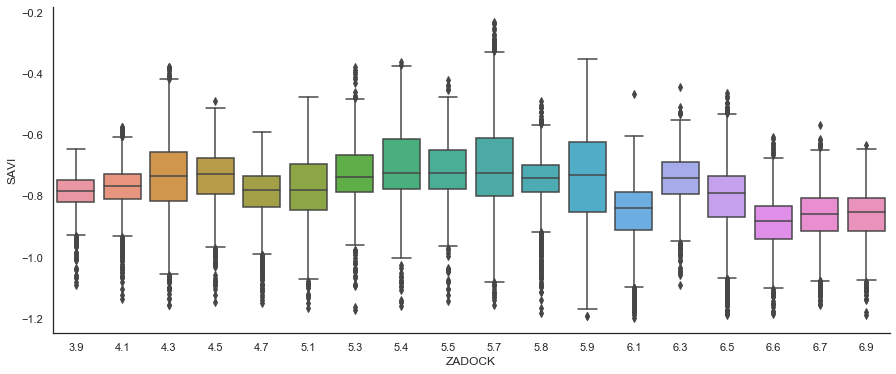

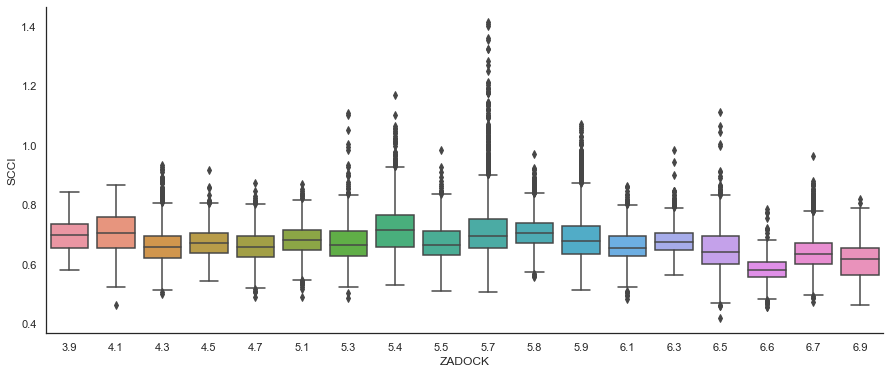

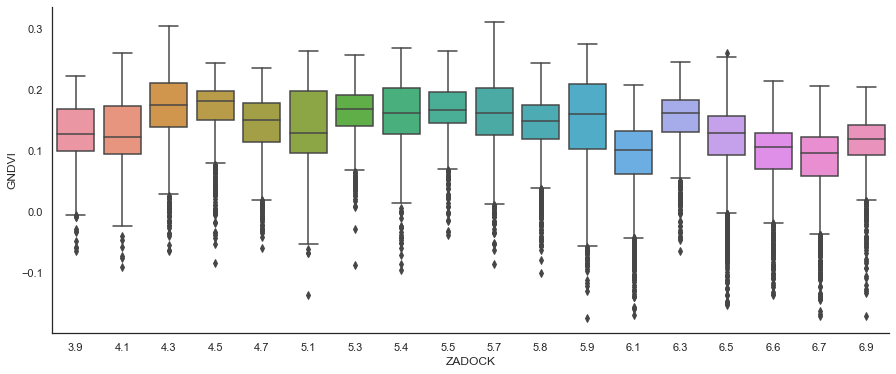

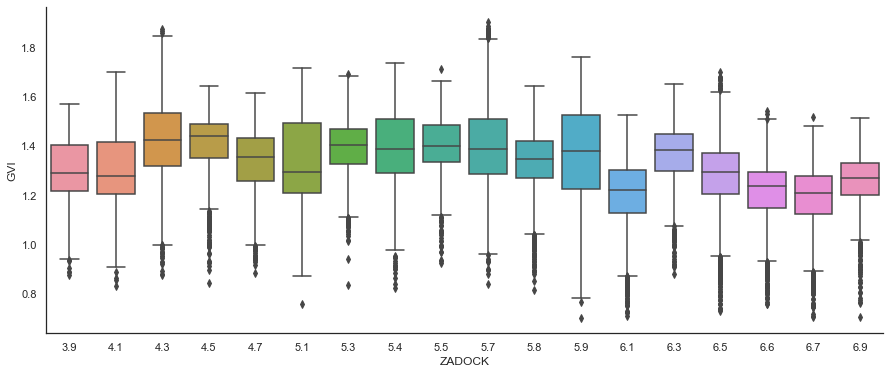

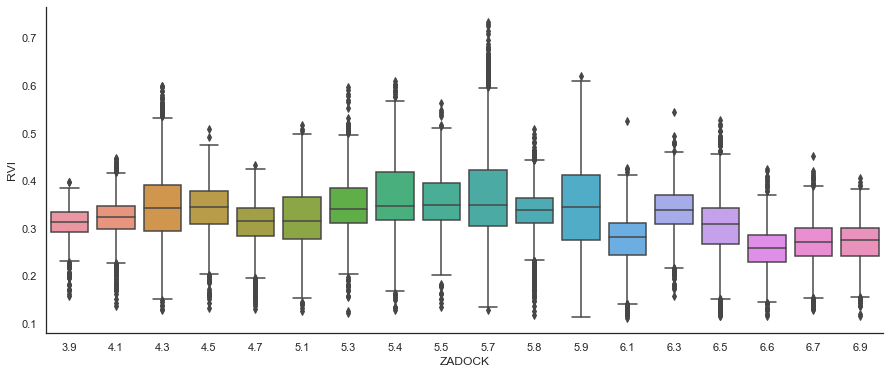

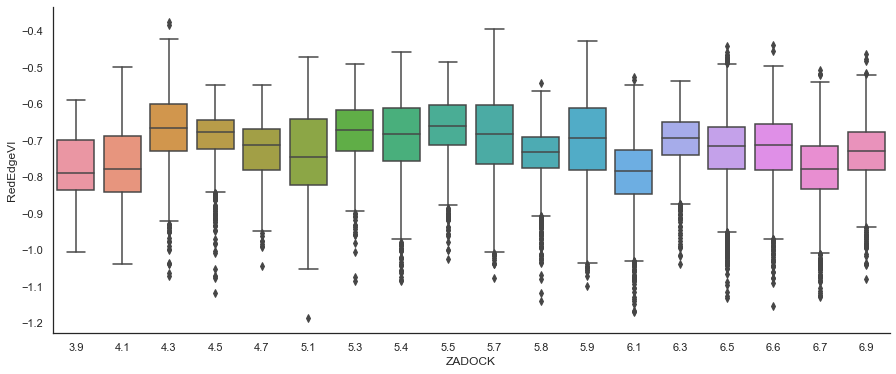

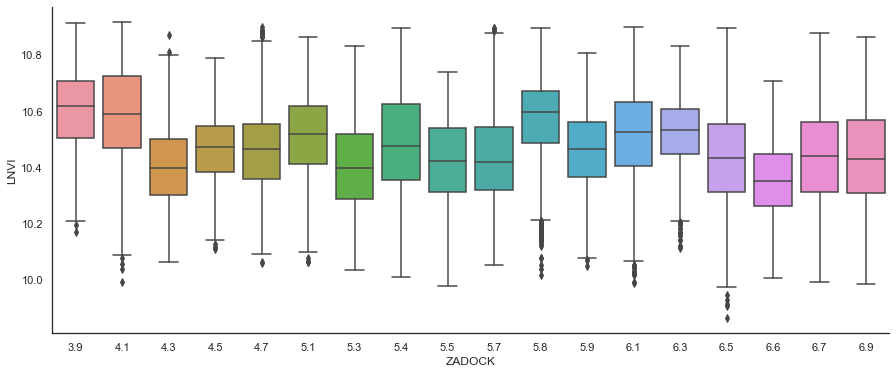

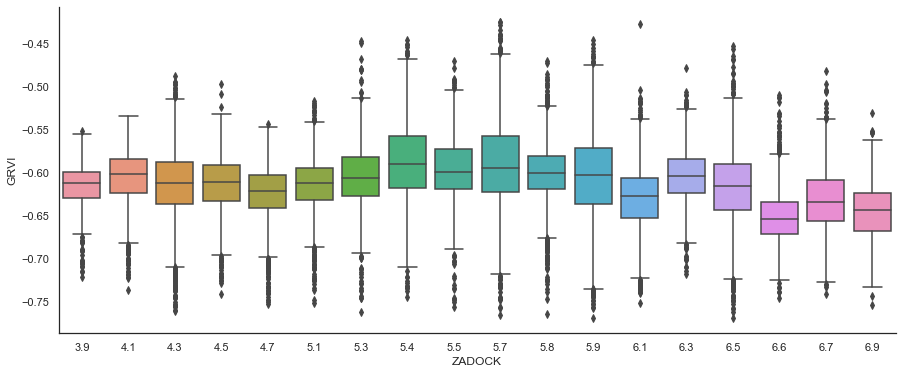

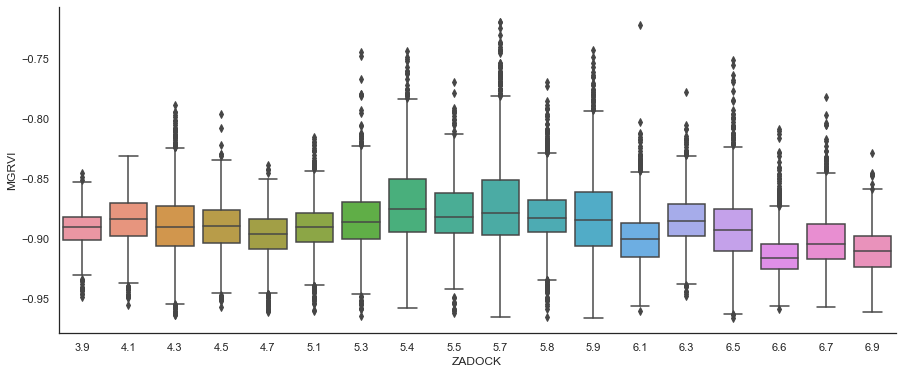

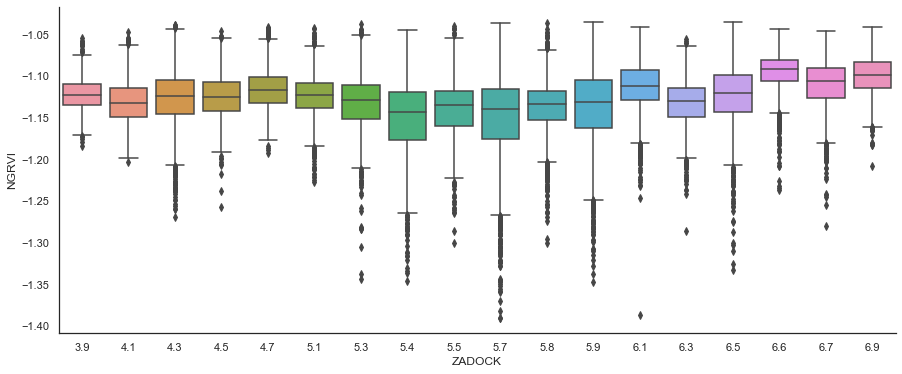

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('NDVI'))
plt.ylabel('NDVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('NDRE'))
plt.ylabel('NDRE')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('SAVI'))
plt.ylabel('SAVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('SCCI'))
plt.ylabel('SCCI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('GNDVI'))
plt.ylabel('GNDVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('GVI'))
plt.ylabel('GVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('RVI'))
plt.ylabel('RVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('RedEdgeVI'))
plt.ylabel('RedEdgeVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('LNVI'))
plt.ylabel('LNVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('GRVI'))
plt.ylabel('GRVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('MGRVI'))
plt.ylabel('MGRVI')
plt.xlabel('ZADOCK')
sns.despine()

plt.figure(figsize=(15, 6))
sns.boxplot(data=Zadock_indices,x='ZADOCK_Cat', y=('NGRVI'))
plt.ylabel('NGRVI')
plt.xlabel('ZADOCK')
sns.despine()

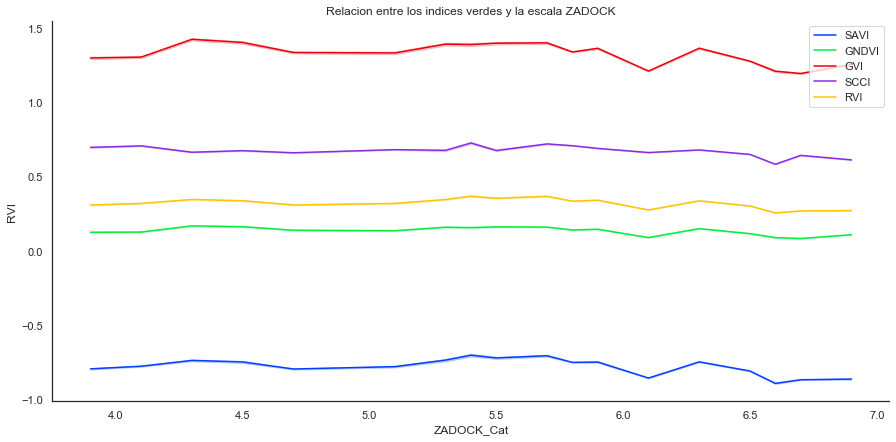

In [ ]:
plt.figure(figsize=(15, 7))
plt.title('Relacion entre los indices verdes y la escala ZADOCK')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='SAVI',label='SAVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='GNDVI', label='GNDVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='GVI',label='GVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='SCCI',label= 'SCCI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='RVI', label='RVI')
sns.despine()

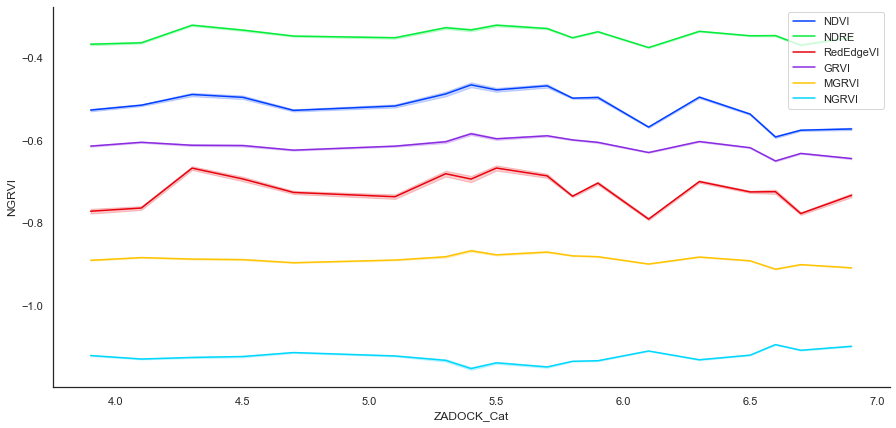

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='NDVI',label='NDVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='NDRE', label='NDRE')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='RedEdgeVI',label='RedEdgeVI')
#sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='LNVI',label= 'LNVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='GRVI', label='GRVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='MGRVI',label='MGRVI')
sns.lineplot(data=Zadock_indices, x='ZADOCK_Cat', y='NGRVI', label='NGRVI')
plt.legend(loc=1)
sns.despine()

Al igual que con las bandas, no se presenta un tendencia entre las estapas ZADOCK y los distintos indices calculados. 


### DISTRIBUCION  DE LOS RENDIMIENTOS POR VARIEDADES

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

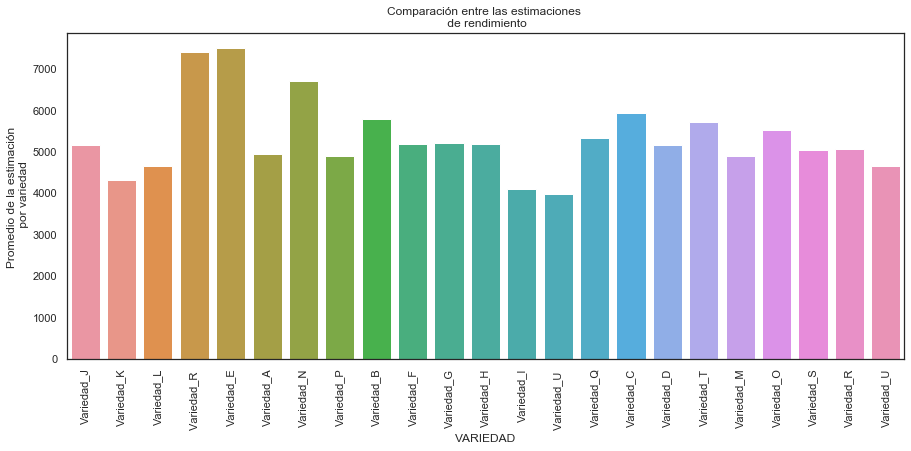

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='Variedad', y='RDTO', ci=None)
plt.ylabel('Promedio de la estimación \n por variedad')
plt.xlabel('VARIEDAD')
plt.title('Comparación entre las estimaciones \n de rendimiento')
plt.xticks(rotation=90)


Las variedades E y R fueron las que mayor rendimiento presentaron, mientras que la variedad U la de menor. 